Всемирный доклад о счастье — ежегодный доклад, подготовленный группой независимых ученых из Канады, Великобритании и США по заказу ООН.
В изучаемом датасете - данные 2019 года.

Изучим взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.


In [23]:
# Проведем первичный анализ
# Импортируем библиотеки

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [2]:
# Загружаем датасет, выводим на просмотр
df = pd.read_csv('/content/world_happiness_report_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


156 записей (исследований).
Пропущенных значений нет.
9 столбцов:
 - Overall rank (общий рейтинг) - тип данных int64 (целочисленный)<br>  
 - Country or region - страна или регион со значениями типа object<br>
Остальные 7 столбцов типа данных с плавающей запятой - float64 являются непрерывными<br>
 - Score - баллы                        
 - GDP per capita - ВВП на душу населения             
 - Social support - соц.поддержка               
 - Healthy life expectancy - ожидаемая продолжительность здоровой жизни      
 - Freedom to make life choices - свобода выбора в жизни
 - Generosity - щедрость                   
 - Perceptions of corruption - восприятие коррупции   


In [5]:
# Анализ статистических характеристик
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


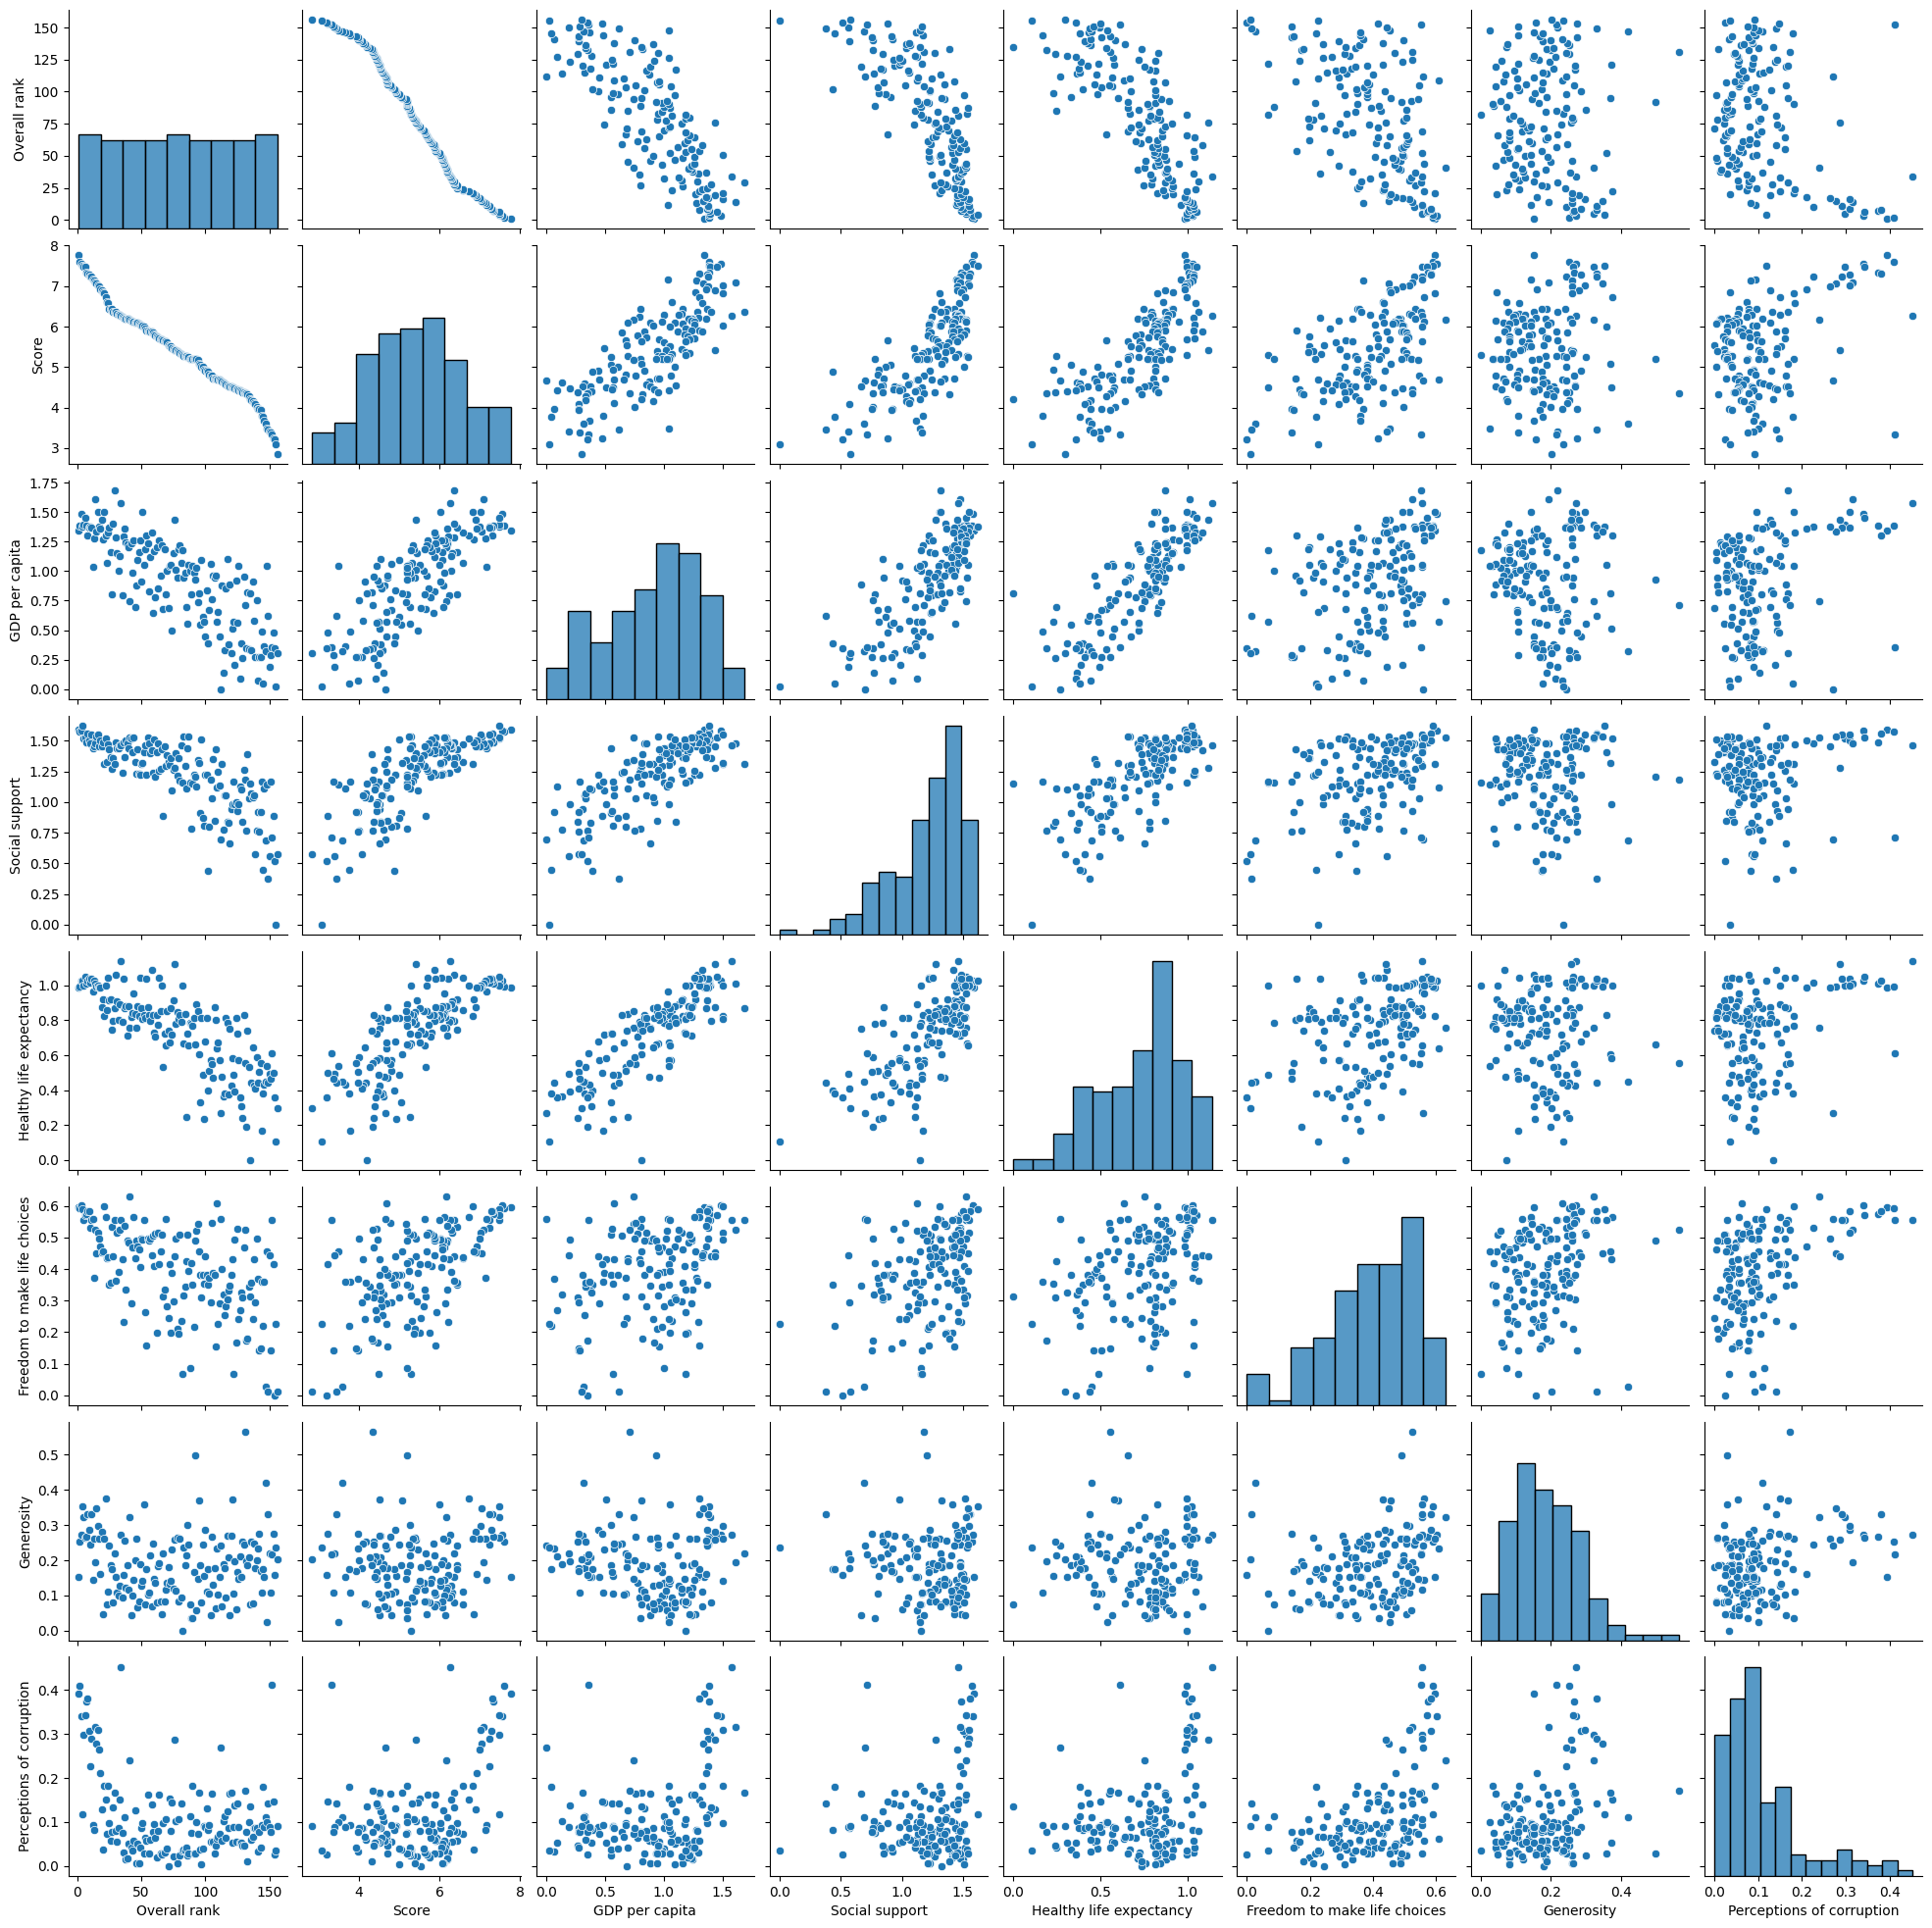

In [6]:
sns.pairplot(df)

**Проведем анализ корреляции между ВВП на душу населения и оценкой счастья.**
Используем коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья, т.к измеряем линейную зависимость между двумя количественными переменными (имеют один тип данных)

In [8]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['GDP per capita'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7938828678781275
P-значение: 4.315480913319406e-35


In [10]:
df['GDP per capita'].corr(df['Score'], method = 'pearson')

0.7938828678781275

Коэффициент корреляции Пирсона равен 0.79, что указывает на сильную положительную корреляцию между двумя переменными. Это означает, что при увеличении одной переменной другая также увеличивается.

P-значение (4.32e-35) очень мало, что говорит о статистической значимости этой корреляции. Можно уверенно сделать вывод, что связь между переменными не случайна.

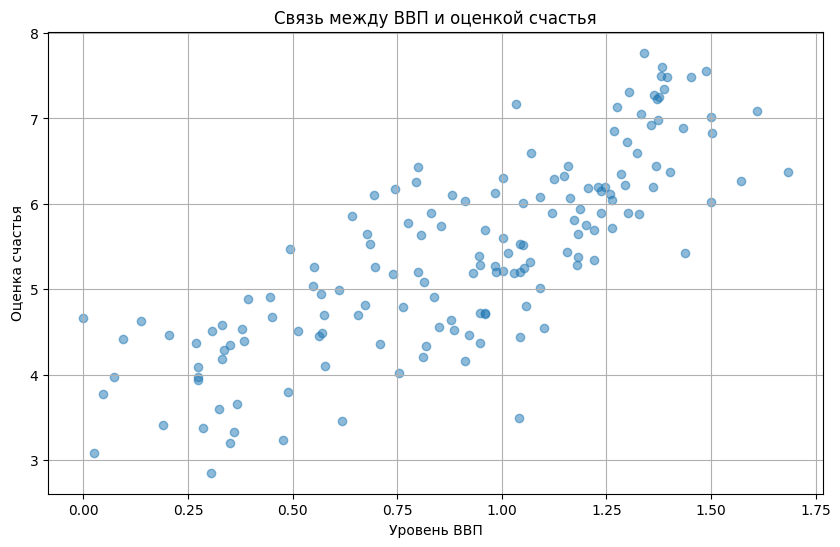

In [13]:
# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP per capita'], df['Score'], alpha=0.5)
plt.title('Связь между ВВП и оценкой счастья')
plt.xlabel('Уровень ВВП')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()


**Исследуем влияние социальной поддержки на оценку счастья.**
Применим коэффициент Пирсона и Спирмена для анализа отношений между социальной поддержкой и оценками счастья.И сравним.



In [16]:
# Применим коэф.Спирмена
coef, p = spearmanr(df['Social support'], df['Score'])
print(f"Коэффициент корреляции Спирмена между уровнем социальной поддержки и оценкой счастья: {coef}, P-value: {p}")

Коэффициент корреляции Спирмена между уровнем социальной поддержки и оценкой счастья: 0.8161807357057258, P-value: 1.613098226311642e-38


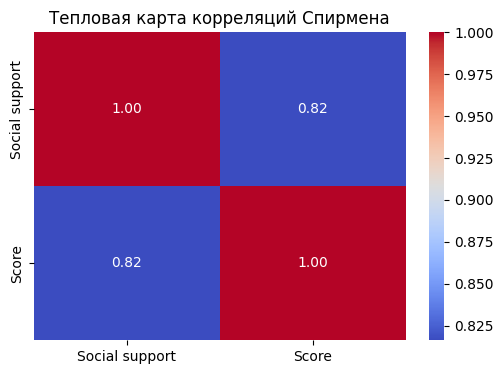

In [20]:
# Выборка количественных переменных
quantitative_vars = df[['Social support', 'Score']]
correlation_matrix = quantitative_vars.corr(method='spearman')  # Вычисляем матрицу корреляций Спирмена

# Тепловая карта корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

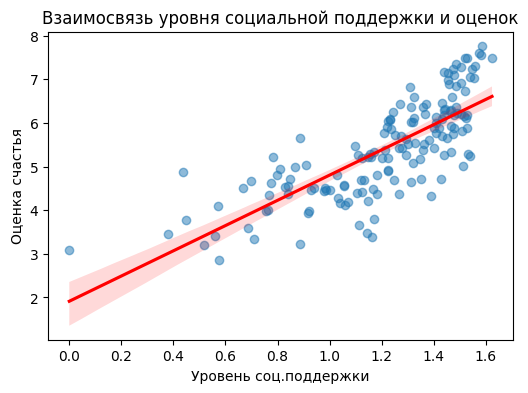

In [22]:
# График рассеивания с линией тренда для
plt.figure(figsize=(6, 4))
sns.regplot(x='Social support', y='Score', data=df, scatter_kws={'alpha': 0.5}, \
            line_kws={'color': 'red'})
plt.title('Взаимосвязь уровня социальной поддержки и оценок')
plt.xlabel('Уровень соц.поддержки')
plt.ylabel('Оценка счастья')
plt.show()

Этот метод позволяет оценить ранговую связь между переменными, не требуя нормального распределения данных. Коэффициент близок к 1, это указывает на положительную монотонную связь. Можно сделать вывод о том, что более высокий уровень социальной поддержки связан с более высокими оценками.

In [ ]:
# Коэффициент корреляции Пирсона
corr_coefficient, p_value = stats.pearsonr(df['Social support'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {corr_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7770577880638642
P-значение: 8.975119655183787e-33


Коэффициент корреляции Пирсона между двумя переменными равен 0.78, что указывает на сильную положительную корреляцию. Это означает, что при увеличении одной переменной другая также увеличивается.

P-значение (8.98e-33) очень мало, что говорит о статистической значимости этой корреляции.

Так как все переменные у нас - непрерывные, правильнее использовать коэф. Пирсона

**Посмотрим на взаимосвязь между продолжительностью здоровой жизни и оценками счастья,** использовав коэффициент корреляции Кэнделла.

Коэффициент корреляции Кэнделла: 0.6026128531700047, P-value: 8.000780684230196e-29


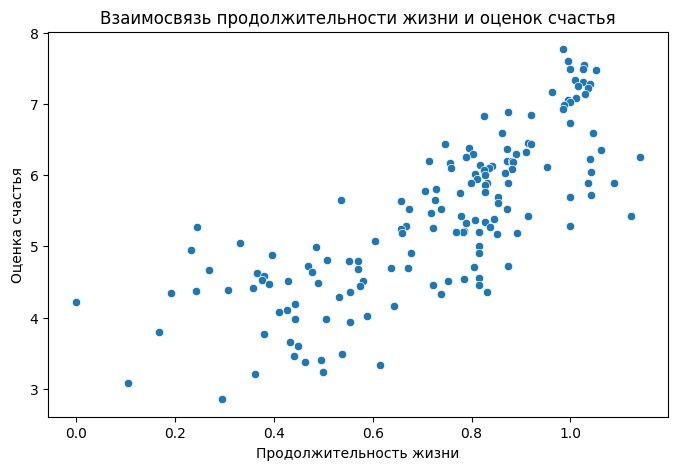

In [25]:
# Расчет коэффициента Кэнделла
tau, p_value = kendalltau(df["Healthy life expectancy"], df["Score"])
print(f"Коэффициент корреляции Кэнделла: {tau}, P-value: {p_value}")

# Визуализация
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Healthy life expectancy", y="Score", data=df)
plt.title('Взаимосвязь продолжительности жизни и оценок счастья')
plt.xlabel('Продолжительность жизни')
plt.ylabel('Оценка счастья')
plt.show()

Коэффициент корреляции Кенделла между двумя переменными измеряет степень их монотонной связи. P-value очень мало (8.000780684230196e-29), что позволяет нам считать, что между переменными есть статистически значимая связь.

**Свобода делать жизненный выбор и уровень счастья**. Проанализируем, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [26]:
# Коэффициент корреляции Пирсона
corr_coefficient, p_value = stats.pearsonr(df['Freedom to make life choices'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {corr_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.5667418257199902
P-значение: 1.23792436279821e-14


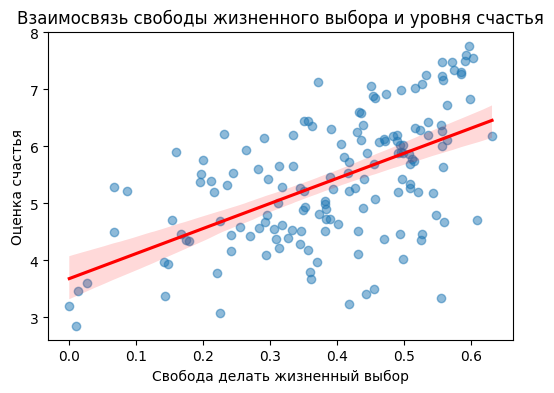

In [27]:
# График рассеивания с линией тренда для
plt.figure(figsize=(6, 4))
sns.regplot(x='Freedom to make life choices', y='Score', data=df, scatter_kws={'alpha': 0.5}, \
            line_kws={'color': 'red'})
plt.title('Взаимосвязь свободы жизненного выбора и уровня счастья')
plt.xlabel('Свобода делать жизненный выбор')
plt.ylabel('Оценка счастья')
plt.show()

P-значение очень мало (1.23792436279821e-14), что позволяет нам считать, что между переменными есть статистически значимая связь. Также эту связь наблюдаем на графике

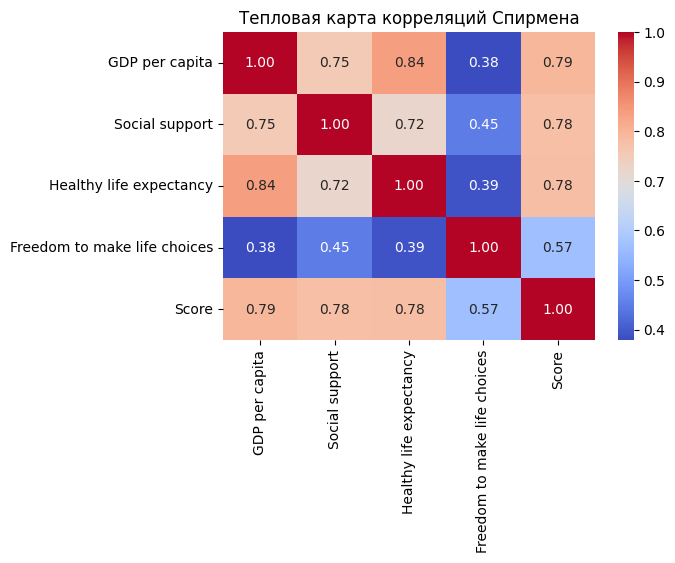

In [29]:
# Выведем все выше проанализированные влияния
# Выборка количественных переменных
quantitative_vars = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Score']]

# Calculate the correlation matrix
correlation_matrix = quantitative_vars.corr(method='pearson') # Use the .corr() method on the DataFrame

# Тепловая карта корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

Наиболее сильно связан с уровнем счастья в анализируемых странах фактор:<br>
1. ВВП (0,79),<br>
2. Соц.поддержка и продолж.жизни (0,78), чуть менее, но также достаточное влияние оказывают.<br>
- Свобода выбора (0,57) оказывает меньшее влияние.


Интересно взаимодействие ВВП и продолжительности жизни (0,84), очень высокая корреляция, т.е оказывают значительное влияние во взаимосвязи.